In [41]:
#load model and testing data
import pickle

with open('../local_data/all_b_chosen_test_img.pickle', 'rb') as f:
    X_test, y_test = pickle.load(f)

In [89]:
from tensorflow import keras

model = keras.models.load_model('../models/all_chosen_pre_model_9.keras')

c:\Users\juliu\Documents\dscs\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 842ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


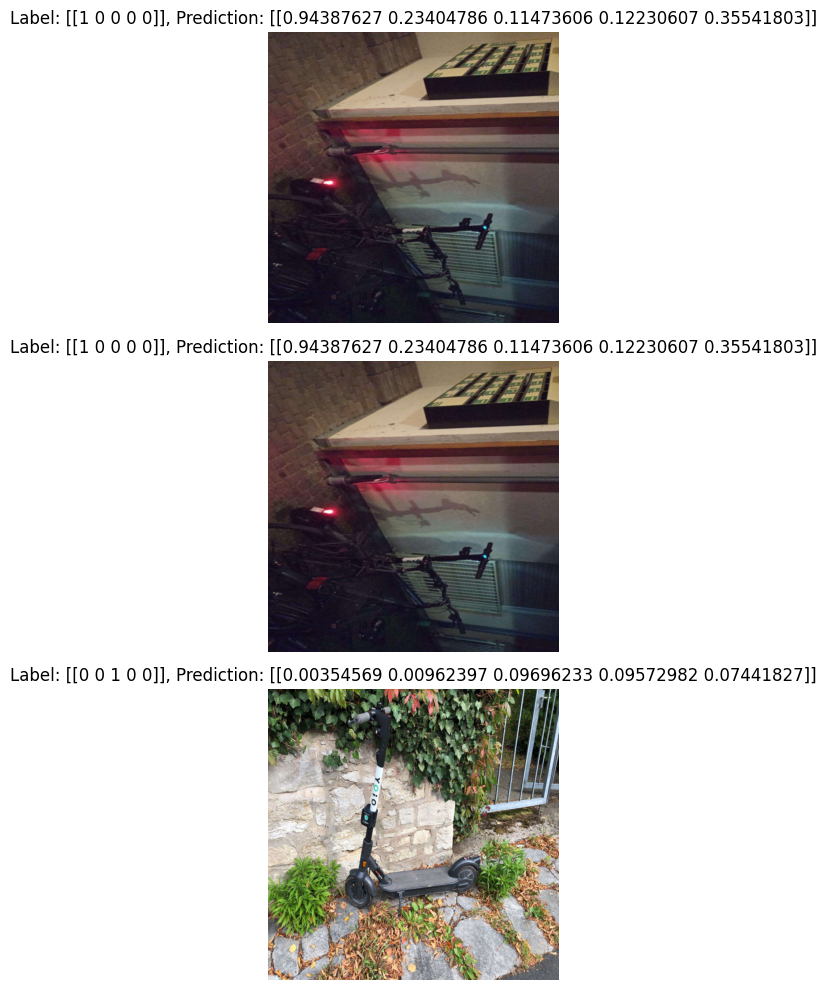

In [90]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure X_test, y_test, and predicted_classes are defined and accessible in this cell
X_test = X_test.astype('uint8')

fig, axes = plt.subplots(3, 1, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    idx = np.random.randint(X_test.shape[0])
    ax.imshow(X_test[idx])
    ax.set_title(f"Label: {y_test[idx:idx+1]}, Prediction: {(model.predict(X_test[idx:idx+1]))}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [91]:
y_pred = model.predict(X_test)


y_pred_bin = (y_pred > 0.5).astype(int)

5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step


In [92]:
from sklearn.metrics import hamming_loss, accuracy_score, roc_auc_score, precision_recall_fscore_support
import numpy as np

# Convert y_test to multilabel-indicator format
y_test_multilabel = np.argmax(y_test, axis=1)

# Convert y_pred_bin to multilabel-indicator format
y_pred_bin_multilabel = np.argmax(y_pred_bin, axis=1)

# Calculate metrics using the converted arrays
h_loss = hamming_loss(y_test_multilabel, y_pred_bin_multilabel)
accuracy = accuracy_score(y_test_multilabel, y_pred_bin_multilabel)
#roc_auc = roc_auc_score(y_test_multilabel, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test_multilabel, y_pred_bin_multilabel, average=None)


In [93]:
print(f"Hamming Loss: {h_loss}")
print(f"Accuracy: {accuracy}")
#print(f"ROC AUC: {roc_auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Hamming Loss: 0.4025157232704403
Accuracy: 0.5974842767295597
Precision: [0.72727273 0.25       0.6        0.41025641 0.25      ]
Recall: [0.76595745 0.14285714 0.27272727 0.72727273 0.09090909]
F1 Score: [0.74611399 0.18181818 0.375      0.52459016 0.13333333]
